In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style

style.use('ggplot')
%matplotlib inline

In [4]:
"""
There are NaN values we have to take care of
"""
df = pd.read_csv('data/movie_metadata.csv', 
                 header = 0)

df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [49]:
df.columns

Index([u'color', u'director_name', u'num_critic_for_reviews', u'duration',
       u'director_facebook_likes', u'actor_3_facebook_likes', u'actor_2_name',
       u'actor_1_facebook_likes', u'gross', u'genres', u'actor_1_name',
       u'movie_title', u'num_voted_users', u'cast_total_facebook_likes',
       u'actor_3_name', u'facenumber_in_poster', u'plot_keywords',
       u'movie_imdb_link', u'num_user_for_reviews', u'language', u'country',
       u'content_rating', u'budget', u'title_year', u'actor_2_facebook_likes',
       u'imdb_score', u'aspect_ratio', u'movie_facebook_likes'],
      dtype='object')

In [32]:
"""
Lets see how many null values there are 
"""
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [50]:
"""
Looks like we have to find and input the names ourselves
"""
df[df['actor_1_facebook_likes'].isnull()][['movie_title','actor_1_name','actor_2_name','actor_3_name']]

,movie_title,actor_1_name,actor_2_name,actor_3_name
4502,"Pink Ribbons, Inc.",NaN,NaN,NaN
4519,Sex with Strangers,NaN,NaN,NaN
4720,The Harvest/La Cosecha,NaN,NaN,NaN
4837,Ayurveda: Art of Being,NaN,NaN,NaN
4945,The Brain That Sings,NaN,NaN,NaN
4946,The Blood of My Brother,NaN,NaN,NaN
4990,Counting,NaN,NaN,NaN


C:\Users\phay\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


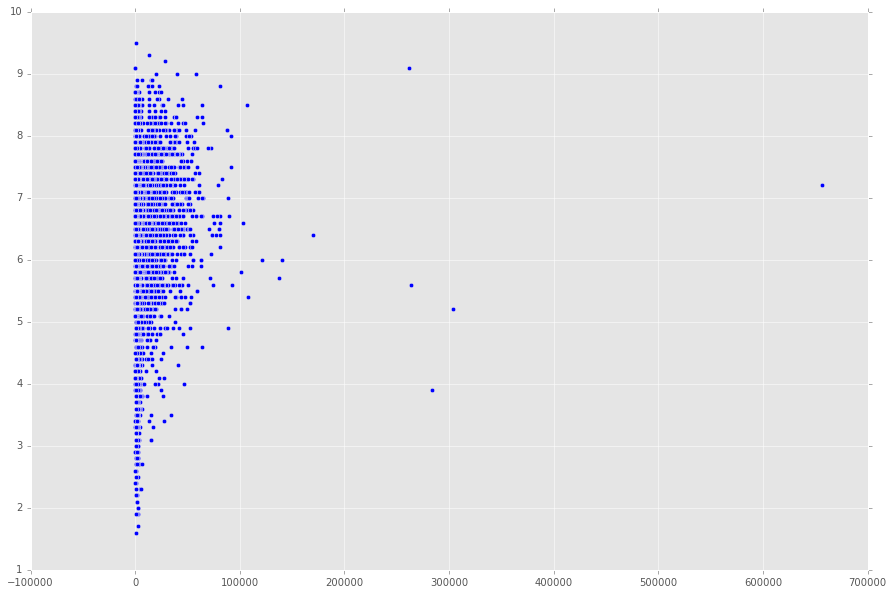

In [30]:
temp_df = df.copy()
temp_df.sort(inplace = True)

temp_df 

plt.figure(figsize = (15,10))
plt.scatter(temp_df['cast_total_facebook_likes'],temp_df['imdb_score'])